# Salary Prediction: Data Analysis and Modeling

**Kai Nguyen** - 21/8/2025

# A. Data exploration 

### Import library

In [1]:
# import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

#setting
pd.set_option('display.max_columns',50)
pd.set_option('display.max_rows',50)
sns.set(style='whitegrid')
RND = 42

### Load dataset

In [2]:
# load dataset
df = pd.read_csv('FOAI-assignment2-1.csv')

## 1. Quick view of the data

### a. Read metadata/dictionary

In [3]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000.0,EUR,85847.0,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000.0,USD,30000.0,US,100,US,S
2,2023,MI,CT,ML Engineer,25500.0,USD,25500.0,US,100,US,S
3,2023,SE,FT,Data Scientist,175000.0,USD,175000.0,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000.0,USD,120000.0,CA,100,CA,M


In [4]:
df.tail(3)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
1497,2020,EN,FT,Data Scientist,105000.0,USD,105000.0,US,100,US,S
1498,2020,EN,CT,Business Data Analyst,100000.0,USD,100000.0,US,100,US,L
1499,2021,SE,FT,Data Science Manager,7000000.0,INR,94665.0,IN,50,IN,L


In [5]:
df.sample(5)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
1275,2020,MI,FT,Data Science Consultant,103000.0,USD,103000.0,US,100,US,L
983,2022,EX,FT,Data Engineer,242000.0,USD,242000.0,US,100,US,M
1200,2020,MI,FT,Product Data Analyst,20000.0,USD,20000.0,HN,0,HN,S
949,2022,MI,FT,Data Engineer,80000.0,EUR,84053.0,GR,100,GR,M
799,2022,SE,FT,Data Scientist,140000.0,USD,140000.0,US,100,US,L


### b. Check dataset size

In [6]:
df.shape

(1500, 11)

### c. Check data types of each variable

In [7]:
df.dtypes

work_year               int64
experience_level       object
employment_type        object
job_title              object
salary                float64
salary_currency        object
salary_in_usd         float64
employee_residence     object
remote_ratio            int64
company_location       object
company_size           object
dtype: object

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   work_year           1500 non-null   int64  
 1   experience_level    1500 non-null   object 
 2   employment_type     1500 non-null   object 
 3   job_title           1500 non-null   object 
 4   salary              1494 non-null   float64
 5   salary_currency     1500 non-null   object 
 6   salary_in_usd       1494 non-null   float64
 7   employee_residence  1500 non-null   object 
 8   remote_ratio        1500 non-null   int64  
 9   company_location    1500 non-null   object 
 10  company_size        1500 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 129.0+ KB


In [9]:
df['salary_currency'].value_counts()

salary_currency
USD    1190
EUR     133
GBP      85
INR      40
CAD      20
AUD       5
SGD       4
BRL       4
DKK       3
PLN       3
JPY       3
TRY       3
CHF       2
HUF       2
HKD       1
MXN       1
CLP       1
Name: count, dtype: int64

## 2. Data Quality Check

### a. Missing values (null, NaN)

In [10]:
df.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                6
salary_currency       0
salary_in_usd         6
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [11]:
df.isnull().mean()

work_year             0.000
experience_level      0.000
employment_type       0.000
job_title             0.000
salary                0.004
salary_currency       0.000
salary_in_usd         0.004
employee_residence    0.000
remote_ratio          0.000
company_location      0.000
company_size          0.000
dtype: float64

**Drop Missing Values**

In [12]:
df_cleaned = df.dropna()
df_cleaned

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000.0,EUR,85847.0,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000.0,USD,30000.0,US,100,US,S
2,2023,MI,CT,ML Engineer,25500.0,USD,25500.0,US,100,US,S
3,2023,SE,FT,Data Scientist,175000.0,USD,175000.0,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000.0,USD,120000.0,CA,100,CA,M
...,...,...,...,...,...,...,...,...,...,...,...
1495,2020,SE,FT,Data Scientist,412000.0,USD,412000.0,US,100,US,L
1496,2021,MI,FT,Principal Data Scientist,151000.0,USD,151000.0,US,100,US,L
1497,2020,EN,FT,Data Scientist,105000.0,USD,105000.0,US,100,US,S
1498,2020,EN,CT,Business Data Analyst,100000.0,USD,100000.0,US,100,US,L


### b. Duplicates

## 3. Univariate analysis

### a. Numeric variables

#### Summary statistics for numeric variables (mean, median, min, max, std).

In [14]:
df_cleaned.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,1253.000000,1.253000e+03,1253.000000,1253.000000
mean,2022.027933,2.506594e+05,129141.169194,56.624102
std,0.853494,1.108966e+06,69125.374255,46.909436
min,2020.000000,7.500000e+03,5409.000000,0.000000
25%,2022.000000,8.166600e+04,76833.000000,0.000000
50%,2022.000000,1.323200e+05,125000.000000,100.000000
75%,2023.000000,1.850000e+05,175000.000000,100.000000
max,2023.000000,3.040000e+07,450000.000000,100.000000


In [15]:
df_cleaned['salary_in_usd'].median()

125000.0

In [16]:
df_cleaned['remote_ratio'].median()

100.0

In [17]:
df_cleaned['work_year'].median()

2022.0

#### Target distribution: salary_in_usd

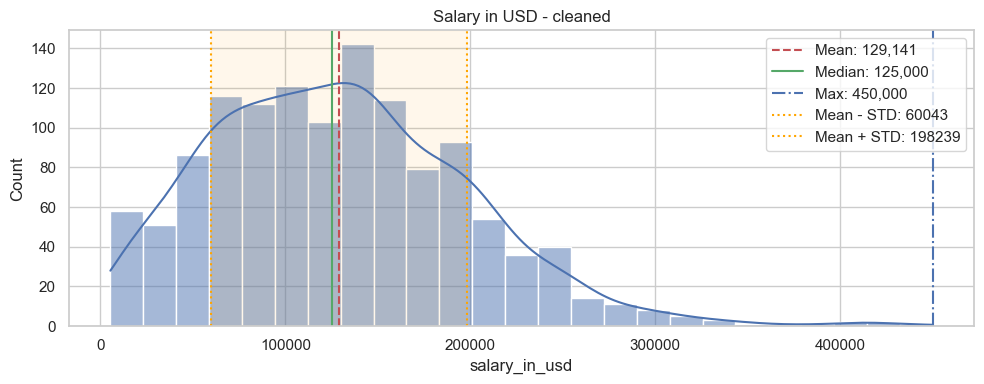

In [18]:
salaries = df_cleaned['salary_in_usd']

# count statistical values
mean_salary = np.mean(salaries)
median_salary = np.median(salaries)
max_salary = np.max(salaries)
std_salary = np.std(salaries)

# draw histogram + KDE
plt.figure(figsize=(10, 4))
sns.histplot(salaries, kde=True)

# Add statistical lines
plt.axvline(mean_salary, color='r', linestyle='--', label=f'Mean: {mean_salary:,.0f}')
plt.axvline(median_salary, color='g', linestyle='-', label=f'Median: {median_salary:,.0f}')
plt.axvline(max_salary, color='b', linestyle='-.', label=f'Max: {max_salary:,.0f}')
plt.axvline(mean_salary - std_salary, color='orange', linestyle=':', label=f'Mean - STD: {mean_salary - std_salary:.0f}')
plt.axvline(mean_salary + std_salary, color='orange', linestyle=':', label=f'Mean + STD: {mean_salary + std_salary:.0f}')

# make color
plt.axvspan(mean_salary - std_salary, mean_salary + std_salary, color='orange', alpha=0.08)
# Tùy chỉnh biểu đồ
plt.title('Salary in USD - cleaned')
plt.xlabel('salary_in_usd')
plt.ylabel('Count')
plt.legend()
plt.tight_layout()
plt.show()

#### Work_year and Remote_ratio

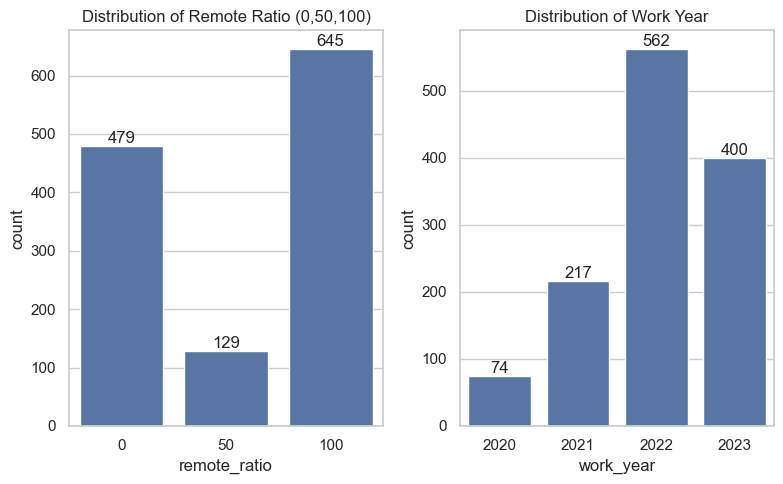

In [19]:
plt.figure(figsize=(8,5)) #set size: width 8 inch, height 5 inch
plt.subplot(1,2,1) #set the number figure 
ax = sns.countplot(x='remote_ratio',data=df_cleaned)
ax.bar_label(ax.containers[0]) # attach number into col and start with col 0
plt.title("Distribution of Remote Ratio (0,50,100)")

plt.subplot(1,2,2)
ax = sns.countplot(x='work_year',data=df_cleaned)
ax.bar_label(ax.containers[0]) # attach number into col and start with col 0
plt.title("Distribution of Work Year")
plt.tight_layout()
plt.show()


### b. Distribution of categorical variables

In [20]:
df_cleaned.describe(include='object')

,experience_level,employment_type,job_title,salary_currency,employee_residence,company_location,company_size
count,1253,1253,1253,1253,1253,1253,1253
unique,4,4,69,17,61,58,3
top,SE,FT,Data Scientist,USD,US,US,M
freq,713,1226,282,962,848,875,859


#### Experience_level, Employment_type, and Company_size

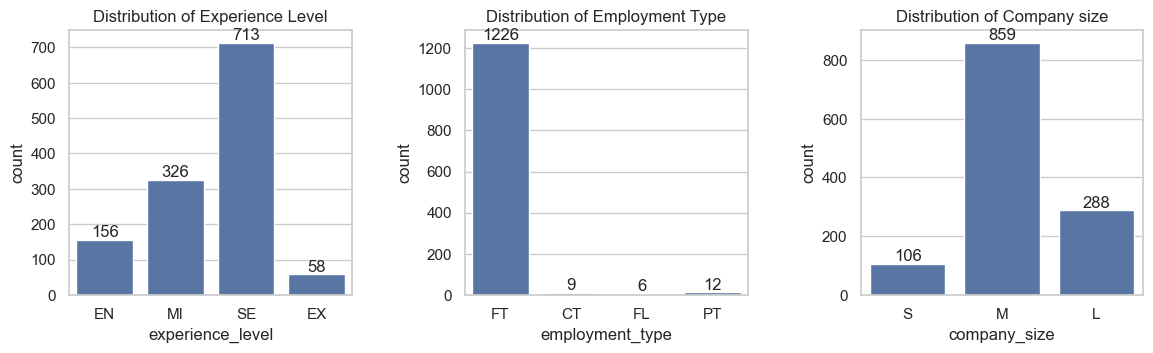

In [21]:
plt.figure(figsize=(12,4))
#Experience_level
plt.subplot(1,3,1) #set the number figure 
ax = sns.countplot(x='experience_level',data=df_cleaned, order=['EN','MI','SE','EX'])
ax.bar_label(ax.containers[0]) # attach number into col and start with col 0
plt.title("Distribution of Experience Level")
#Employment_type
plt.subplot(1,3,2) #set the number figure 
ax = sns.countplot(x='employment_type',data=df_cleaned)
ax.bar_label(ax.containers[0]) # attach number into col and start with col 0
plt.title("Distribution of Employment Type")
#company_size
plt.subplot(1,3,3) #set the number figure 
ax = sns.countplot(x='company_size',data=df_cleaned,order=['S','M','L'])
ax.bar_label(ax.containers[0]) # attach number into col and start with col 0
plt.title("Distribution of Company size")
plt.tight_layout(pad = 2.0)
plt.subplots_adjust(wspace=0.4)   # tăng khoảng cách giữa các subplot
plt.show()


#### Job Title

In [49]:
df['job_title'].value_counts().index

Index(['Data Engineer', 'Data Scientist', 'Data Analyst',
       'Machine Learning Engineer', 'Analytics Engineer', 'Data Architect',
       'Applied Scientist', 'Data Science Manager', 'Research Scientist',
       'Machine Learning Scientist', 'Research Engineer',
       'Computer Vision Engineer', 'ML Engineer', 'Data Analytics Manager',
       'BI Data Analyst', 'AI Scientist', 'Director of Data Science',
       'Business Data Analyst', 'Applied Machine Learning Scientist',
       'Big Data Engineer', 'ETL Developer', 'Data Manager',
       'Principal Data Scientist', 'Applied Data Scientist', 'Head of Data',
       'Data Science Consultant', 'Data Specialist',
       'Data Operations Engineer', 'AI Developer', 'Lead Data Engineer',
       'Lead Data Scientist', 'Machine Learning Infrastructure Engineer',
       'Machine Learning Developer', 'Data Quality Analyst',
       'Business Intelligence Engineer', 'Computer Vision Software Engineer',
       'Head of Data Science', 'Data Anal

In [23]:
df['job_title'].value_counts(normalize = True)

job_title
Data Engineer                0.244000
Data Scientist               0.240000
Data Analyst                 0.140000
Machine Learning Engineer    0.070667
Analytics Engineer           0.035333
                               ...   
Data Analytics Consultant    0.000667
Head of Machine Learning     0.000667
NLP Engineer                 0.000667
Cloud Data Architect         0.000667
Finance Data Analyst         0.000667
Name: proportion, Length: 69, dtype: float64

C:\Users\Khoai\AppData\Local\Temp\ipykernel_24596\489726143.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax= sns.barplot(x=top_jobs.values, y=top_jobs.index, palette="Blues_r")


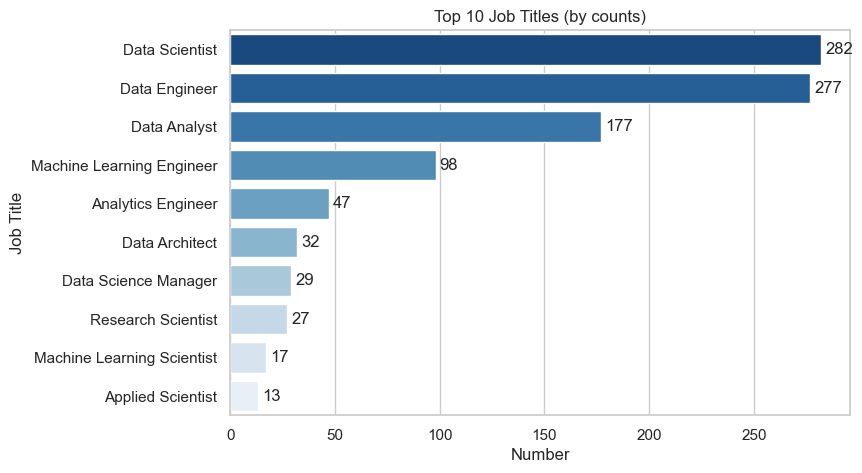

In [24]:
# Bar chart top 10 job_title 
top_jobs = df_cleaned['job_title'].value_counts().nlargest(10)

plt.figure(figsize=(8,5))

ax= sns.barplot(x=top_jobs.values, y=top_jobs.index, palette="Blues_r")
for container in ax.containers:
    ax.bar_label(container, label_type='edge', padding=3)
plt.title("Top 10 Job Titles (by counts)")
plt.xlabel("Number")
plt.ylabel("Job Title")
plt.show()


#### Company_location

In [25]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000.0,EUR,85847.0,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000.0,USD,30000.0,US,100,US,S
2,2023,MI,CT,ML Engineer,25500.0,USD,25500.0,US,100,US,S
3,2023,SE,FT,Data Scientist,175000.0,USD,175000.0,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000.0,USD,120000.0,CA,100,CA,M


In [26]:
com_counts = df_cleaned['company_location'].value_counts()
com_counts

company_location
US    875
GB     83
CA     48
IN     36
DE     34
     ... 
EG      1
AR      1
PH      1
BO      1
MT      1
Name: count, Length: 58, dtype: int64

In [27]:
df_cleaned['company_location'].value_counts(all)

company_location
US    0.698324
GB    0.066241
CA    0.038308
IN    0.028731
DE    0.027135
        ...   
EG    0.000798
AR    0.000798
PH    0.000798
BO    0.000798
MT    0.000798
Name: proportion, Length: 58, dtype: float64

C:\Users\Khoai\AppData\Local\Temp\ipykernel_24596\2690037382.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax= sns.barplot(x=top_jobs.values, y=top_jobs.index, palette="Greens_r")


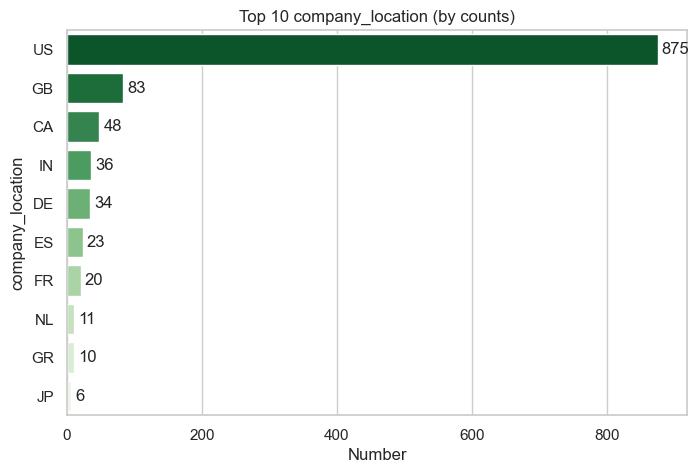

In [28]:
# Bar chart top 10 job_title 
top_jobs = df_cleaned['company_location'].value_counts().nlargest(10)

plt.figure(figsize=(8,5))

ax= sns.barplot(x=top_jobs.values, y=top_jobs.index, palette="Greens_r")
for container in ax.containers:
    ax.bar_label(container, label_type='edge', padding=3)
plt.title("Top 10 company_location (by counts)")
plt.xlabel("Number")
plt.ylabel("company_location")
plt.show()

C:\Users\Khoai\AppData\Local\Temp\ipykernel_24596\3010000063.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax= sns.barplot(x=company_region.values, y=company_region.index, palette="Greens_r")


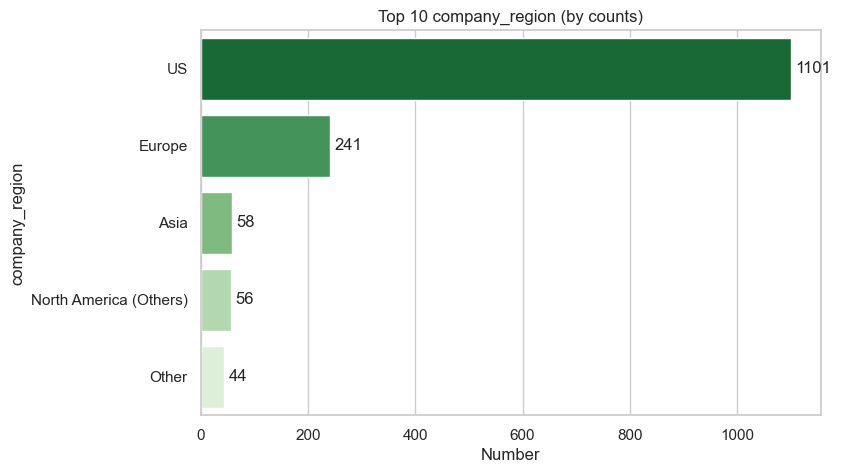

In [29]:
 def map_region(country):
    if country == 'US':
        return 'US'
    elif country in ['GB','DE','FR','ES','IT','NL','GR','BE','PL','AT','SE','CH','FI','DK','IE','CZ','PT','RU','UA']:
        return 'Europe'
    elif country in ['IN','JP','CN','SG','ID','PH','TH','MY','PK','AE','HK','KR','VN']:
        return 'Asia'  
    elif country in ['CA', 'MX', 'PR']:
        return 'North America (Others)' 
    else:
        return 'Other'
df['company_region'] = df['company_location'].apply(map_region)
company_region=df['company_region'].value_counts()
plt.figure(figsize=(8,5))

ax= sns.barplot(x=company_region.values, y=company_region.index, palette="Greens_r")
for container in ax.containers:
    ax.bar_label(container, label_type='edge', padding=3)
plt.title("Top 10 company_region (by counts)")
plt.xlabel("Number")
plt.ylabel("company_region")
plt.show()

#### Employee_residence


In [30]:
emp_counts = df_cleaned['employee_residence'].value_counts()
emp_counts

employee_residence
US    848
GB     78
CA     46
IN     45
DE     29
     ... 
MY      1
ID      1
DO      1
TH      1
MT      1
Name: count, Length: 61, dtype: int64

In [31]:
df_cleaned['employee_residence'].value_counts(all)

employee_residence
US    0.676776
GB    0.062251
CA    0.036712
IN    0.035914
DE    0.023144
        ...   
MY    0.000798
ID    0.000798
DO    0.000798
TH    0.000798
MT    0.000798
Name: proportion, Length: 61, dtype: float64

C:\Users\Khoai\AppData\Local\Temp\ipykernel_24596\3649109963.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax= sns.barplot(x=top_jobs.values, y=top_jobs.index, palette="Reds_r")


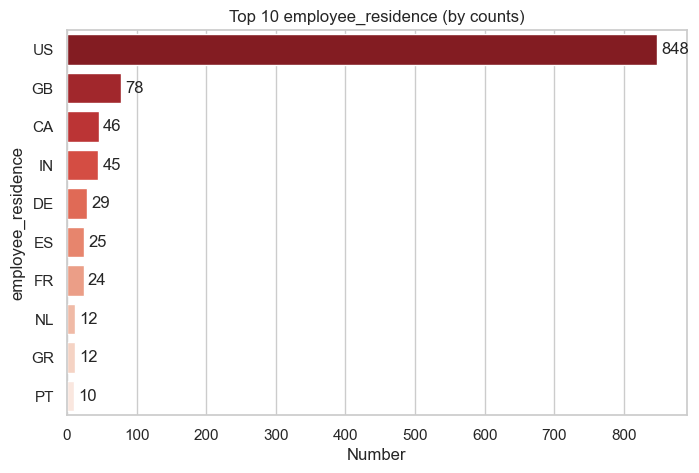

In [32]:
# Bar chart top 10  
top_jobs = df_cleaned['employee_residence'].value_counts().nlargest(10)

plt.figure(figsize=(8,5))

ax= sns.barplot(x=top_jobs.values, y=top_jobs.index, palette="Reds_r")
for container in ax.containers:
    ax.bar_label(container, label_type='edge', padding=3)
plt.title("Top 10 employee_residence (by counts)")
plt.xlabel("Number")
plt.ylabel("employee_residence")
plt.show()

## 3. Relationships & Correlations

In [33]:
df_cleaned.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000.0,EUR,85847.0,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000.0,USD,30000.0,US,100,US,S
2,2023,MI,CT,ML Engineer,25500.0,USD,25500.0,US,100,US,S
3,2023,SE,FT,Data Scientist,175000.0,USD,175000.0,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000.0,USD,120000.0,CA,100,CA,M


### a. Correlation salary_in_usd with others

#### Salary_in_usd vs Experience Level

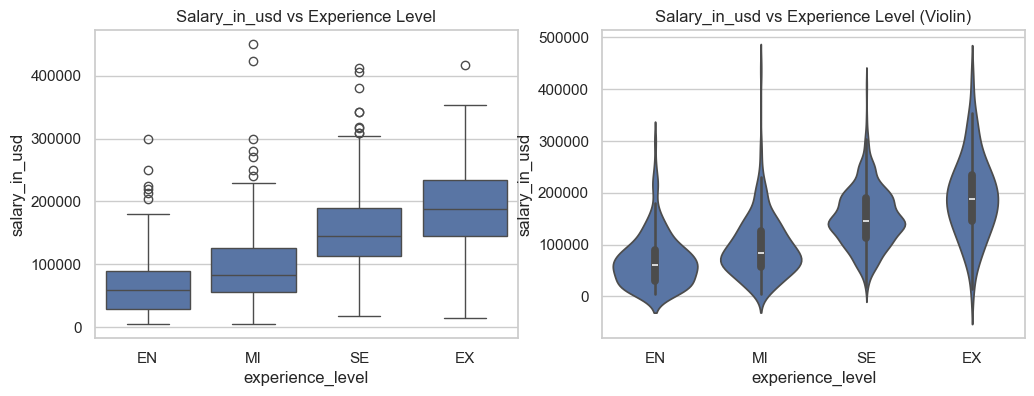

In [34]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.boxplot(x="experience_level", y="salary_in_usd",order=['EN','MI','SE','EX'], data=df)
plt.title("Salary_in_usd vs Experience Level")

# Nếu muốn violin plot:
plt.subplot(1,2,2)
sns.violinplot(x="experience_level", y="salary_in_usd",order=['EN','MI','SE','EX'], data=df)
plt.title("Salary_in_usd vs Experience Level (Violin)")
plt.show()


#### Salary_in_usd vs Job_title

**Group Job Title**

In [35]:
# Table is available as variable `df`
mapping = {
    'Data Scientist':'Data Scientist',
    'Data Engineer': 'Data Engineer',
    'Data Analyst': 'Data Analyst',
    'Machine Learning Engineer': 'Machine Learning Engineer',
   
    "Applied Scientist": "Data Science & ML Research",
    "Research Scientist": "Data Science & ML Research",
    "Machine Learning Scientist": "Data Science & ML Research",
    "Applied Machine Learning Scientist": "Data Science & ML Research",
    "Machine Learning Research Engineer": "Data Science & ML Research",
    "Machine Learning Researcher": "Data Science & ML Research",
    "Research Engineer": "Data Science & ML Research",
    "Computer Vision Engineer": "Data Science & ML Research",
    "Computer Vision Software Engineer": "Data Science & ML Research",
    "3D Computer Vision Researcher": "Data Science & ML Research",
    "NLP Engineer": "Data Science & ML Research",
    "AI Scientist": "Data Science & ML Research",

    # Data Engineering / Infra / MLOps
    "Data Architect": "Data Engineering",
    "Big Data Engineer": "Data Engineering",
    "Big Data Architect": "Data Engineering",
    "Data Manager": "Data Engineering",
    "Data Operations Engineer": "Data Engineering",
    "Data DevOps Engineer": "Data Engineering",
    "MLOps Engineer": "Data Engineering",
    "Machine Learning Infrastructure Engineer": "Data Engineering",
    "Machine Learning Developer": "Data Engineering",
    "ETL Developer": "Data Engineering",
    "ETL Engineer": "Data Engineering",
    "Cloud Data Engineer": "Data Engineering",
    "Cloud Data Architect": "Data Engineering",
    "BI Data Engineer": "Data Engineering",
    "Lead Data Engineer": "Data Engineering",
    "Principal Data Engineer": "Data Engineering",

    # Analytics & BI
    "Data Analytics Manager": "Analytics & BI",
    "BI Data Analyst": "Analytics & BI",
    "Business Data Analyst": "Analytics & BI",
    "Data Analytics Engineer": "Analytics & BI",
    "Data Analytics Lead": "Analytics & BI",
    "Data Analytics Consultant": "Analytics & BI",
    "Product Data Analyst": "Analytics & BI",
    "Principal Data Analyst": "Analytics & BI",
    "Lead Data Analyst": "Analytics & BI",
    "Staff Data Analyst": "Analytics & BI",
    "Marketing Data Analyst": "Analytics & BI",
    "Financial Data Analyst": "Analytics & BI",
    "Finance Data Analyst": "Analytics & BI",
    "Compliance Data Analyst": "Analytics & BI",
    "Business Intelligence Engineer": "Analytics & BI",

    # Applied Data Science / Generalist
    "Principal Data Scientist": "Applied Data Science",
    "Applied Data Scientist": "Applied Data Science",
    "Lead Data Scientist": "Applied Data Science",
    "Staff Data Scientist": "Applied Data Science",
    "Data Science Engineer": "Applied Data Science",
    "Data Science Consultant": "Applied Data Science",
    "Data Strategist": "Applied Data Science",
    "Data Specialist": "Applied Data Science",
    "Data Quality Analyst": "Applied Data Science",
    "Data Operations Analyst": "Applied Data Science",
    "Data Modeler": "Applied Data Science",

    # Management / Leadership
    "Data Science Manager": "Management",
    "Director of Data Science": "Management",
    "Head of Data": "Management",
    "Head of Data Science": "Management",
    "Head of Machine Learning": "Management",
    "Machine Learning Manager": "Management",
    "Lead Machine Learning Engineer": "Management",

}

# Gán nhóm, những job chưa map sẽ thành "Other"
df_cleaned["job_group"] = df_cleaned["job_title"].map(mapping).fillna("Other")

C:\Users\Khoai\AppData\Local\Temp\ipykernel_24596\3417498958.py:81: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned["job_group"] = df_cleaned["job_title"].map(mapping).fillna("Other")


In [36]:
Splt.figure(figsize=(12, 6))

# Scatter plot gốc
sns.scatterplot(
    data=df_cleaned,
    x="job_group",
    y="salary_in_usd",
    alpha=0.6
)

# Tính mean salary theo job_group
mean_salaries = df_cleaned.groupby("job_group")["salary_in_usd"].mean().reset_index()

# Vẽ đường nối mean values
sns.lineplot(
    data=mean_salaries,
    x="job_group",
    y="salary_in_usd",
    color="red",
    marker="o",
    linewidth=2,
    label="Mean Salary"
)

plt.title("Salary vs Job Group (Scatter + Mean Line)")
plt.xlabel("Job Group")
plt.ylabel("Salary (USD)")
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

NameError: name 'Splt' is not defined

#### Salary vs Region

##### Group location

In [37]:
# Table is available as variable `df_cleaned`
def map_region(country):
    if country == 'US':
        return 'US'
    elif country in ['GB','DE','FR','ES','IT','NL','GR','BE','PL','AT','SE','CH','FI','DK','IE','CZ','PT','RU','UA']:
        return 'Europe'
    elif country in ['IN','JP','CN','SG','ID','PH','TH','MY','PK','AE','HK','KR','VN']:
        return 'Asia'  
    elif country in ['CA', 'MX', 'PR']:
        return 'NA (Others)' 
    else:
        return 'Other'
df_cleaned['company_region'] = df_cleaned['company_location'].apply(map_region)
df_cleaned['residence_region'] = df_cleaned['employee_residence'].apply(map_region)

C:\Users\Khoai\AppData\Local\Temp\ipykernel_24596\834265208.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['company_region'] = df_cleaned['company_location'].apply(map_region)
C:\Users\Khoai\AppData\Local\Temp\ipykernel_24596\834265208.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['residence_region'] = df_cleaned['employee_residence'].apply(map_region)


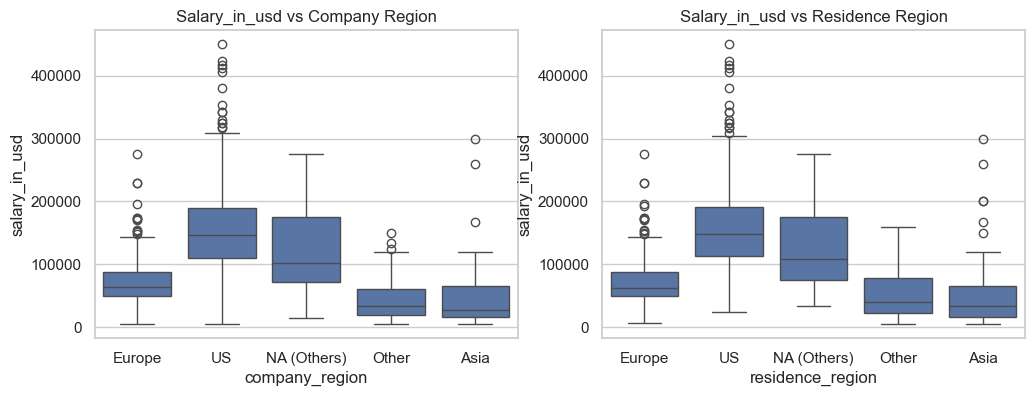

In [38]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.boxplot(x="company_region", y="salary_in_usd", data=df_cleaned)
plt.title("Salary_in_usd vs Company Region")

plt.subplot(1,2,2)
sns.boxplot(x="residence_region", y="salary_in_usd", data=df_cleaned)
plt.title("Salary_in_usd vs Residence Region")
plt.show()

#### Salary vs Work year

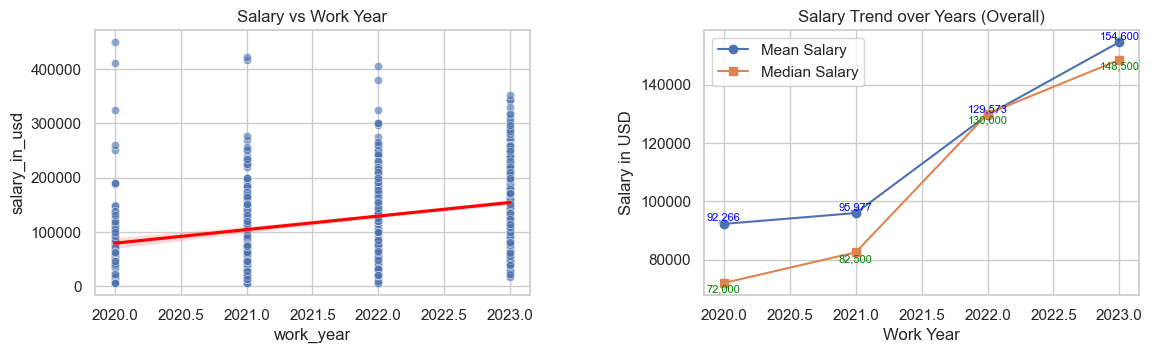

In [39]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.scatterplot(x="work_year", y="salary_in_usd", data=df, alpha=0.6)
sns.regplot(x="work_year", y="salary_in_usd", data=df, scatter=False, color="red")
plt.title("Salary vs Work Year")

yearly_stats = df.groupby("work_year")["salary_in_usd"].agg(["mean", "median"]).reset_index()
plt.subplot(1,2,2)
plt.plot(yearly_stats["work_year"], yearly_stats["mean"], marker="o", label="Mean Salary")
plt.plot(yearly_stats["work_year"], yearly_stats["median"], marker="s", label="Median Salary")

# Thêm nhãn cho từng điểm
for i in range(len(yearly_stats)):
    year = yearly_stats["work_year"][i]
    mean_val = yearly_stats["mean"][i]
    median_val = yearly_stats["median"][i]
    
    # Hiển thị giá trị mean
    plt.text(year, mean_val + 500, f"{int(mean_val):,}", ha='center', va='bottom', fontsize=8, color='blue')
    
    # Hiển thị giá trị median
    plt.text(year, median_val - 500, f"{int(median_val):,}", ha='center', va='top', fontsize=8, color='green')

plt.title("Salary Trend over Years (Overall)")
plt.xlabel("Work Year")
plt.ylabel("Salary in USD")
plt.legend()

plt.tight_layout(pad = 2.0)
plt.subplots_adjust(wspace=0.4)
plt.show()

#### Salary vs insignificant feature

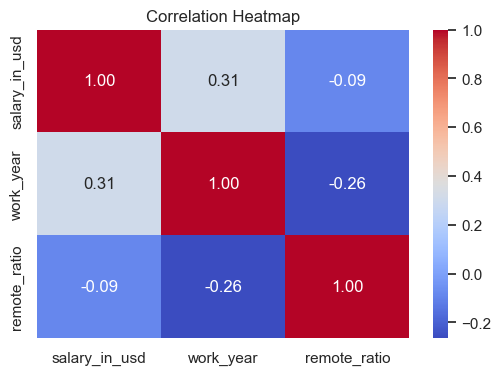

In [40]:
plt.figure(figsize=(6,4))
corr = df[['salary_in_usd', 'work_year', 'remote_ratio']].corr()

sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

##### Salary vs remote

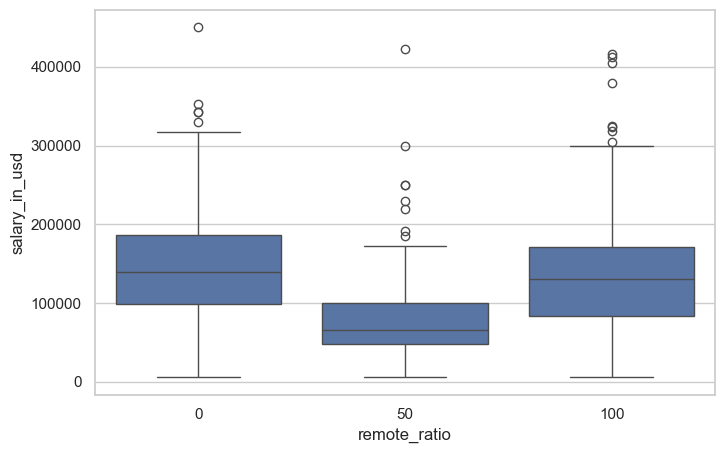

In [41]:
plt.figure(figsize=(8,5))
sns.boxplot(x="remote_ratio", y="salary_in_usd", data=df,
            order=[0,50,100])
plt.show()

##### Salary_in_usd vs Company_size

Text(0.5, 1.0, 'Salary vs Company Size')

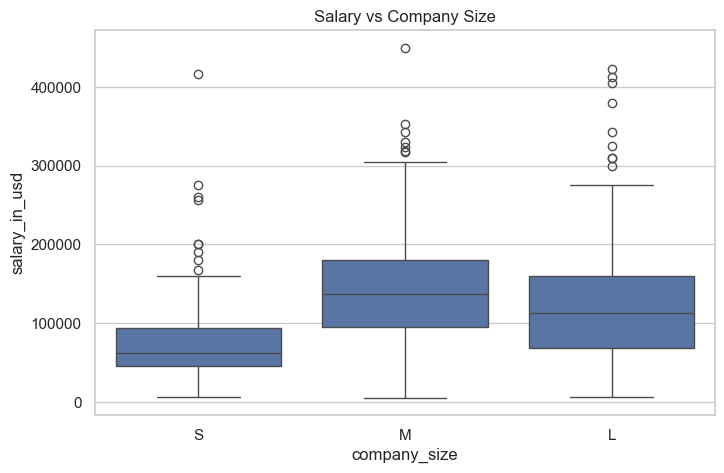

In [42]:
plt.figure(figsize=(8,5))

sns.boxplot(x="company_size", y="salary_in_usd", data=df, order=["S","M","L"])  
plt.title("Salary vs Company Size")


### b. Currency Conversion Check

In [43]:
# prevent divide 0 / NaN
df_cleaned['implied_rate'] = df_cleaned['salary_in_usd'] / df_cleaned['salary']
df_cleaned['implied_rate'].replace([np.inf, -np.inf], np.nan, inplace=True)

# general
df_cleaned.groupby('salary_currency')['implied_rate'].agg(['count','median','mean','std']).sort_values('count', ascending=False)


C:\Users\Khoai\AppData\Local\Temp\ipykernel_24596\1470075691.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['implied_rate'] = df_cleaned['salary_in_usd'] / df_cleaned['salary']
C:\Users\Khoai\AppData\Local\Temp\ipykernel_24596\1470075691.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the ori

,count,median,mean,std
salary_currency,,,,
USD,962,1.000000,1.000000,0.000000
EUR,123,1.140457,1.115573,0.058783
GBP,77,1.231327,1.255151,0.055887
INR,39,0.013521,0.013201,0.000444
CAD,20,0.782883,0.778888,0.021197
AUD,5,0.693091,0.691108,0.004432
BRL,4,0.189441,0.189441,0.004711
SGD,4,0.744118,0.740878,0.010917
DKK,3,0.158939,0.156956,0.003437


# B. Data Preparation

## 1 Flag outliers

In [44]:
import warnings
warnings.simplefilter(action='ignore', category=DeprecationWarning)
# Table is available as variable `df`
def flag_outliers_iqr(group):
    Q1 = group['salary_in_usd'].quantile(0.25)
    Q3 = group['salary_in_usd'].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return ((group['salary_in_usd'] < lower) | (group['salary_in_usd'] > upper)).astype(int)
    
df_cleaned['flag_job_group'] = df_cleaned.groupby('job_group', group_keys=False).apply(flag_outliers_iqr)
df_cleaned['flag_exp_level'] = df_cleaned.groupby('experience_level', group_keys=False).apply(flag_outliers_iqr)
df_cleaned['flag_work_year'] = df_cleaned.groupby('work_year', group_keys=False).apply(flag_outliers_iqr)
df_cleaned['flag_company_size'] = df_cleaned.groupby('company_size', group_keys=False).apply(flag_outliers_iqr)
df_cleaned['flag_company_region'] = df_cleaned.groupby('company_region', group_keys=False).apply(flag_outliers_iqr)
df_cleaned['flag_residence_region'] = df_cleaned.groupby('residence_region', group_keys=False).apply(flag_outliers_iqr)
df_cleaned['flag_remote_ratio'] = df_cleaned.groupby('remote_ratio', group_keys=False).apply(flag_outliers_iqr)

C:\Users\Khoai\AppData\Local\Temp\ipykernel_24596\543047524.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['flag_job_group'] = df_cleaned.groupby('job_group', group_keys=False).apply(flag_outliers_iqr)
C:\Users\Khoai\AppData\Local\Temp\ipykernel_24596\543047524.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['flag_exp_level'] = df_cleaned.groupby('experience_level', group_keys=False).apply(flag_outliers_iqr)
C:\Users\Khoai\AppData\Local\Temp\ipykernel_24596\543047524.py:14: 

In [45]:
df_cleaned.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,job_group,company_region,residence_region,implied_rate,flag_job_group,flag_exp_level,flag_work_year,flag_company_size,flag_company_region,flag_residence_region,flag_remote_ratio
0,2023,SE,FT,Principal Data Scientist,80000.0,EUR,85847.0,ES,100,ES,L,Applied Data Science,Europe,Europe,1.073087,0,0,0,0,0,0,0
1,2023,MI,CT,ML Engineer,30000.0,USD,30000.0,US,100,US,S,Other,US,US,1.000000,0,0,0,0,0,0,0
2,2023,MI,CT,ML Engineer,25500.0,USD,25500.0,US,100,US,S,Other,US,US,1.000000,0,0,0,0,0,0,0
3,2023,SE,FT,Data Scientist,175000.0,USD,175000.0,CA,100,CA,M,Data Scientist,NA (Others),NA (Others),1.000000,0,0,0,0,0,0,0
4,2023,SE,FT,Data Scientist,120000.0,USD,120000.0,CA,100,CA,M,Data Scientist,NA (Others),NA (Others),1.000000,0,0,0,0,0,0,0


## 2. Drop Outliers

In [46]:
flag_cols = ['flag_job_group','flag_exp_level','flag_work_year','flag_company_size','flag_company_region','flag_residence_region','flag_remote_ratio']
df_cleaned = df_cleaned[~(df_cleaned[flag_cols] == 1).any(axis=1)]

In [47]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1193 entries, 0 to 1499
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   work_year              1193 non-null   int64  
 1   experience_level       1193 non-null   object 
 2   employment_type        1193 non-null   object 
 3   job_title              1193 non-null   object 
 4   salary                 1193 non-null   float64
 5   salary_currency        1193 non-null   object 
 6   salary_in_usd          1193 non-null   float64
 7   employee_residence     1193 non-null   object 
 8   remote_ratio           1193 non-null   int64  
 9   company_location       1193 non-null   object 
 10  company_size           1193 non-null   object 
 11  job_group              1193 non-null   object 
 12  company_region         1193 non-null   object 
 13  residence_region       1193 non-null   object 
 14  implied_rate           1193 non-null   float64
 15  flag_job_

In [50]:
df_cleaned.describe()
df = df_cleaned

# C. Model Training 

## Random Forest

In [56]:
import numpy as np
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split, KFold, cross_val_score, RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import joblib
import warnings

warnings.filterwarnings('ignore')

# --- CONFIG ---
TARGET = 'salary_in_usd'
RANDOM_STATE = 42
TEST_SIZE = 0.2
USE_LOG_TARGET = True   # set False nếu không muốn log-transform

# assume `df` is already loaded in your namespace
# --- 0. quick checks (optional) ---
assert TARGET in df.columns, f"{TARGET} không tồn tại trong df"
print("Rows:", len(df))
print("Missing in target:", df[TARGET].isna().sum())

# --- 1. prepare X, y ---
X = df.drop(columns=[TARGET,'salary','implied_rate','flag_job_group','flag_exp_level','flag_work_year','flag_company_size','flag_company_region','flag_residence_region','flag_remote_ratio','employment_type','employee_residence','job_title','company_location'
])
y = df[TARGET].copy()

# drop rows with missing target
mask_drop = y.notna()
X = X.loc[mask_drop].reset_index(drop=True)
y = y.loc[mask_drop].reset_index(drop=True)

# --- 2. (optional) log-transform y to stabilize skewness ---
if USE_LOG_TARGET:
    y_trans = np.log1p(y)    # use log1p to handle zeros
else:
    y_trans = y

# --- 3. detect numeric and categorical columns automatically ---
numeric_cols = X.select_dtypes(include=['number']).columns.tolist()
categorical_cols = X.select_dtypes(include=['object', 'category', 'bool']).columns.tolist()
print("Numeric cols:", numeric_cols)
print("Categorical cols:", categorical_cols)

# If you have datetime columns, convert to features BEFORE this step (year, month, etc).

# --- 4. train/test split ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y_trans, test_size=TEST_SIZE, random_state=RANDOM_STATE
)

# --- 5. preprocessing pipelines ---

# prepare OneHotEncoder args for compatibility across scikit-learn versions
oo_args = {'handle_unknown': 'ignore'}
major, minor, *_ = [int(x) for x in sklearn.__version__.split('.')]
if (major, minor) >= (1, 2):
    # scikit-learn ≥1.2
    oo_args['sparse_output'] = False
else:
    # scikit-learn <1.2
    oo_args['sparse'] = False

numeric_pipeline = Pipeline([
    ('impute', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler()),
])

categorical_pipeline = Pipeline([
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(**oo_args)),
])

preprocessor = ColumnTransformer([
    ('num', numeric_pipeline, numeric_cols),
    ('cat', categorical_pipeline, categorical_cols),
])

# --- 6. full pipeline with model ---
model = RandomForestRegressor(random_state=RANDOM_STATE, n_jobs=-1)
pipe = Pipeline([
    ('pre', preprocessor),
    ('model', model)
])

# --- 7. quick fit (baseline) ---
pipe.fit(X_train, y_train)
y_pred_test = pipe.predict(X_test)

# helper to invert log-transform
def inv_transform(y_t):
    return np.expm1(y_t) if USE_LOG_TARGET else y_t

y_test_orig = inv_transform(y_test)
y_pred_orig = inv_transform(y_pred_test)

rmse = mean_squared_error(y_test_orig, y_pred_orig, squared=False)
mae = mean_absolute_error(y_test_orig, y_pred_orig)
r2 = r2_score(y_test_orig, y_pred_orig)
print(f"Baseline test RMSE: {rmse:.2f}, MAE: {mae:.2f}, R2: {r2:.4f}")

# --- 8. cross-validation on training set ---
cv = KFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)
cv_scores = cross_val_score(
    pipe, X_train, y_train,
    cv=cv,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1
)
print("CV neg_root_rmse (on transformed target):", cv_scores)
print("CV RMSE (median):", -np.median(cv_scores))

# --- 9. Hyperparameter tuning (RandomizedSearchCV) ---
param_dist = {
    'model__n_estimators': [100, 300, 600],
    'model__max_depth': [None, 8, 15, 30],
    'model__min_samples_split': [2, 5, 10],
    'model__min_samples_leaf': [1, 2, 4],
    'model__max_features': ['auto', 'sqrt', 0.3]
}

rs = RandomizedSearchCV(
    pipe,
    param_distributions=param_dist,
    n_iter=25,
    cv=3,
    scoring='neg_root_mean_squared_error',
    random_state=RANDOM_STATE,
    n_jobs=-1,
    verbose=1
)

rs.fit(X_train, y_train)
print("Best params:", rs.best_params_)

# evaluate tuned model on test set
y_pred_best = rs.predict(X_test)
y_pred_best_orig = inv_transform(y_pred_best)

rmse_best = mean_squared_error(y_test_orig, y_pred_best_orig, squared=False)
mae_best = mean_absolute_error(y_test_orig, y_pred_best_orig)
r2_best = r2_score(y_test_orig, y_pred_best_orig)
print(f"Tuned test RMSE: {rmse_best:.2f}, MAE: {mae_best:.2f}, R2: {r2_best:.4f}")

# --- 10. Save final model (the whole pipeline) ---
joblib.dump(rs.best_estimator_, 'salary_regressor_pipeline.joblib')
print("Saved model to salary_regressor_pipeline.joblib")

Rows: 1193
Missing in target: 0
Numeric cols: ['work_year', 'remote_ratio']
Categorical cols: ['experience_level', 'salary_currency', 'company_size', 'job_group', 'company_region', 'residence_region']
Baseline test RMSE: 40560.43, MAE: 31835.73, R2: 0.5452
CV neg_root_rmse (on transformed target): [-0.3623843  -0.43943493 -0.40485439 -0.37940415 -0.41703752]
CV RMSE (median): 0.40485438732084744
Fitting 3 folds for each of 25 candidates, totalling 75 fits
Best params: {'model__n_estimators': 100, 'model__min_samples_split': 5, 'model__min_samples_leaf': 1, 'model__max_features': 0.3, 'model__max_depth': 15}
Tuned test RMSE: 40083.04, MAE: 31204.26, R2: 0.5558
Saved model to salary_regressor_pipeline.joblib


In [58]:
from sklearn.model_selection import cross_val_score, KFold

cv = KFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)
scores = cross_val_score(
    pipe, X, y_trans,
    cv=cv,
    scoring='r2',
    n_jobs=-1
)
print("R² on each fold", scores)
print("R² average:", np.mean(scores))

R² on each fold [0.64156187 0.67832518 0.68843507 0.66265404 0.66587221]
R² average: 0.6673696756374572
